In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_rost = pd.read_csv("ATUS DATA 03-19/atus_rost_0319.dat")

#TERRP = How is this person related to you?
# "There is no distinction between 18 and 19"
roster_list = [18,19] # 18 and 19 = self 
multi_rost = multi_rost[multi_rost["TERRP"].isin(roster_list)]
#multi_rost.head(20)

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp.columns.to_list()

In [5]:
multi_merged1 = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = pd.merge(multi_merged1, multi_rost, on="TUCASEID")
#multi_merged = pd.merge(multi_resp, multi_rost, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TEAGE", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged.head(20)

## Age Between 65 or Greater  Population

In [6]:
#p65_greater_codes = [3,4] # 3= Age Between 65 or Greater  - on layoff, 3 = Age Between 65 or Greater  - looking
#multi_merged_p65_greater = multi_merged[multi_merged["TELFS"].isin(p65_greater_codes)]
#multi_merged_p65_greater["TELFS"].unique()

multi_merged_p65_greater = multi_merged[(multi_merged["TEAGE"] >= 65)]
multi_merged_p65_greater

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
687,20030101030549,180,180,01,0101,010101,-1,68,1.798283e+06,04:00:00,07:00:00,2003
688,20030101030549,60,240,01,0102,010201,-1,68,1.798283e+06,07:00:00,08:00:00,2003
689,20030101030549,30,270,11,1101,110101,1,68,1.798283e+06,08:00:00,08:30:00,2003
690,20030101030549,75,345,01,0102,010201,-1,68,1.798283e+06,08:30:00,09:45:00,2003
691,20030101030549,7,352,18,1814,181401,12,68,1.798283e+06,09:45:00,09:52:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4121248,20191212192256,10,805,02,0209,020904,1,75,6.548353e+06,17:15:00,17:25:00,2019
4121249,20191212192256,95,900,12,1203,120303,1,75,6.548353e+06,17:25:00,19:00:00,2019
4121250,20191212192256,90,990,01,0101,010101,-1,75,6.548353e+06,19:00:00,20:30:00,2019
4121251,20191212192256,105,1095,12,1203,120303,1,75,6.548353e+06,20:30:00,22:15:00,2019


In [7]:
p65_greater_2003 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p65_greater_weight = p65_greater_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p65_greater_weight = atus_2003_p65_greater_weight["TUFNWGTP"].sum()
atus_2003_p65_greater_weight

12502691204.231308

## 2003-2019 Residential - Age Between 65 or Greater 

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_p65_greater = multi_merged_p65_greater[multi_merged_p65_greater["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_p65_greater

In [9]:
#atus residential year seperation by p65_greater population 
atus_2003_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_p65_greater = atus_multi_yr_res_p65_greater[atus_multi_yr_res_p65_greater["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_p65_greater.head(30)

### 2003 All Residential Activities - Age Between 65 or Greater  Population

In [10]:
atus_2003_all_res_p65_greater = atus_2003_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2003_all_res_p65_greater

,TUACTDUR24
TUCASEID,
20030101030549,1145
20030101030843,1150
20030101031007,1320
20030101031049,1440
20030101031055,1353
...,...
20031212033044,925
20031212033077,1066
20031212033114,1270


In [11]:
atus_2003_all_res_p65_greater_merge = pd.merge(atus_2003_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2003_all_res_p65_greater_merge

,TUCASEID,TUACTDUR24,TUFNWGTP
0,20030101030549,1145,1.798283e+06
1,20030101030843,1150,5.196677e+06
2,20030101031007,1320,3.681494e+06
3,20030101031049,1440,3.876824e+06
4,20030101031055,1353,3.075222e+06
...,...,...,...
3473,20031212033044,925,2.221994e+06
3474,20031212033077,1066,1.326797e+06
3475,20031212033114,1270,2.188040e+06
3476,20031212033151,1423,1.222893e+06


In [12]:
atus_2003_all_res_p65_greater_merge["Multiplied Weight"] = atus_2003_all_res_p65_greater_merge["TUACTDUR24"] * atus_2003_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2003_all_res_p65_greater_merge

In [13]:
atus_2003_all_res_p65_greater_multiplied_weight = atus_2003_all_res_p65_greater_merge["Multiplied Weight"].sum()
atus_2003_all_res_p65_greater_multiplied_weight

15545766303489.17

In [14]:
p65_greater_2003 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p65_greater_weight = p65_greater_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p65_greater_weight = atus_2003_p65_greater_weight["TUFNWGTP"].sum()
atus_2003_p65_greater_weight

12502691204.231308

In [15]:
all_act_2003_res_p65_greater_hpd = atus_2003_all_res_p65_greater_multiplied_weight / atus_2003_p65_greater_weight / 60
all_act_2003_res_p65_greater_hpd

20.723226769806686

### 2004 All Residential Activities - Age Between 65 or Greater  Population

In [16]:
atus_2004_all_res_p65_greater = atus_2004_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_p65_greater

In [17]:
atus_2004_all_res_p65_greater_merge = pd.merge(atus_2004_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_p65_greater_merge["Multiplied Weight"] = atus_2004_all_res_p65_greater_merge["TUACTDUR24"] * atus_2004_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2004_all_res_p65_greater_merge

In [18]:
p65_greater_2004 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_p65_greater_weight = p65_greater_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_p65_greater_weight = atus_2004_p65_greater_weight["TUFNWGTP"].sum()

atus_2004_all_res_p65_greater_multiplied_weight = atus_2004_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_p65_greater_hpd = atus_2004_all_res_p65_greater_multiplied_weight / atus_2004_p65_greater_weight / 60
all_act_2004_res_p65_greater_hpd

20.67407545280653

### 2005 All Residential Activities - Age Between 65 or Greater  Population

In [20]:
atus_2005_all_res_p65_greater = atus_2005_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_p65_greater

In [21]:
atus_2005_all_res_p65_greater_merge = pd.merge(atus_2005_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_p65_greater_merge["Multiplied Weight"] = atus_2005_all_res_p65_greater_merge["TUACTDUR24"] * atus_2005_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2005_all_res_p65_greater_merge

In [22]:
p65_greater_2005 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_p65_greater_weight = p65_greater_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_p65_greater_weight = atus_2005_p65_greater_weight["TUFNWGTP"].sum()

atus_2005_all_res_p65_greater_multiplied_weight = atus_2005_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_p65_greater_hpd = atus_2005_all_res_p65_greater_multiplied_weight / atus_2005_p65_greater_weight / 60
all_act_2005_res_p65_greater_hpd

20.561725599942058

### 2006 All Residential Activities - Age Between 65 or Greater  Population

In [24]:
atus_2006_all_res_p65_greater = atus_2006_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_p65_greater

In [25]:
atus_2006_all_res_p65_greater_merge = pd.merge(atus_2006_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_p65_greater_merge["Multiplied Weight"] = atus_2006_all_res_p65_greater_merge["TUACTDUR24"] * atus_2006_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2006_all_res_p65_greater_merge

In [26]:
p65_greater_2006 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_p65_greater_weight = p65_greater_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_p65_greater_weight = atus_2006_p65_greater_weight["TUFNWGTP"].sum()

atus_2006_all_res_p65_greater_multiplied_weight = atus_2006_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_p65_greater_hpd = atus_2006_all_res_p65_greater_multiplied_weight / atus_2006_p65_greater_weight / 60
all_act_2006_res_p65_greater_hpd

20.84683641661397

### 2007 All Residential Activities - Age Between 65 or Greater  Population

In [28]:
atus_2007_all_res_p65_greater = atus_2007_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_p65_greater

In [29]:
atus_2007_all_res_p65_greater_merge = pd.merge(atus_2007_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_p65_greater_merge["Multiplied Weight"] = atus_2007_all_res_p65_greater_merge["TUACTDUR24"] * atus_2007_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2007_all_res_p65_greater_merge

In [30]:
p65_greater_2007 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_p65_greater_weight = p65_greater_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_p65_greater_weight = atus_2007_p65_greater_weight["TUFNWGTP"].sum()

atus_2007_all_res_p65_greater_multiplied_weight = atus_2007_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_p65_greater_hpd = atus_2007_all_res_p65_greater_multiplied_weight / atus_2007_p65_greater_weight / 60
all_act_2007_res_p65_greater_hpd

20.553334195886073

### 2008 All Residential Activities - Age Between 65 or Greater  Population

In [32]:
atus_2008_all_res_p65_greater = atus_2008_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_p65_greater

In [33]:
atus_2008_all_res_p65_greater_merge = pd.merge(atus_2008_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_p65_greater_merge["Multiplied Weight"] = atus_2008_all_res_p65_greater_merge["TUACTDUR24"] * atus_2008_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2008_all_res_p65_greater_merge

In [34]:
p65_greater_2008 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_p65_greater_weight = p65_greater_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_p65_greater_weight = atus_2008_p65_greater_weight["TUFNWGTP"].sum()

atus_2008_all_res_p65_greater_multiplied_weight = atus_2008_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_p65_greater_hpd = atus_2008_all_res_p65_greater_multiplied_weight / atus_2008_p65_greater_weight / 60
all_act_2008_res_p65_greater_hpd

20.68959134562103

### 2009 All Residential Activities - Age Between 65 or Greater  Population

In [36]:
atus_2009_all_res_p65_greater = atus_2009_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_p65_greater

In [37]:
atus_2009_all_res_p65_greater_merge = pd.merge(atus_2009_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_p65_greater_merge["Multiplied Weight"] = atus_2009_all_res_p65_greater_merge["TUACTDUR24"] * atus_2009_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2009_all_res_p65_greater_merge

In [38]:
p65_greater_2009 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_p65_greater_weight = p65_greater_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_p65_greater_weight = atus_2009_p65_greater_weight["TUFNWGTP"].sum()

atus_2009_all_res_p65_greater_multiplied_weight = atus_2009_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_p65_greater_hpd = atus_2009_all_res_p65_greater_multiplied_weight / atus_2009_p65_greater_weight / 60
all_act_2009_res_p65_greater_hpd

20.79781353301159

### 2010 All Residential Activities - Age Between 65 or Greater  Population

In [40]:
atus_2010_all_res_p65_greater = atus_2010_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_p65_greater

In [41]:
atus_2010_all_res_p65_greater_merge = pd.merge(atus_2010_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_p65_greater_merge["Multiplied Weight"] = atus_2010_all_res_p65_greater_merge["TUACTDUR24"] * atus_2010_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2010_all_res_p65_greater_merge

In [42]:
p65_greater_2010 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_p65_greater_weight = p65_greater_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_p65_greater_weight = atus_2010_p65_greater_weight["TUFNWGTP"].sum()

atus_2010_all_res_p65_greater_multiplied_weight = atus_2010_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_p65_greater_hpd = atus_2010_all_res_p65_greater_multiplied_weight / atus_2010_p65_greater_weight / 60
all_act_2010_res_p65_greater_hpd

20.82943182359941

### 2011 All Residential Activities - Age Between 65 or Greater  Population

In [44]:
atus_2011_all_res_p65_greater = atus_2011_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_p65_greater

In [45]:
atus_2011_all_res_p65_greater_merge = pd.merge(atus_2011_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p65_greater_merge["Multiplied Weight"] = atus_2011_all_res_p65_greater_merge["TUACTDUR24"] * atus_2011_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2011_all_res_p65_greater_merge

In [46]:
atus_2011_all_res_p65_greater_merge = pd.merge(atus_2011_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p65_greater_merge["Multiplied Weight"] = atus_2011_all_res_p65_greater_merge["TUACTDUR24"] * atus_2011_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2011_all_res_p65_greater_merge

In [47]:
p65_greater_2011 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_p65_greater_weight = p65_greater_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_p65_greater_weight = atus_2011_p65_greater_weight["TUFNWGTP"].sum()

atus_2011_all_res_p65_greater_multiplied_weight = atus_2011_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_p65_greater_hpd = atus_2011_all_res_p65_greater_multiplied_weight / atus_2011_p65_greater_weight / 60
all_act_2011_res_p65_greater_hpd

20.493009301597063

### 2012 All Residential Activities - Age Between 65 or Greater  Population

In [49]:
atus_2012_all_res_p65_greater = atus_2012_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_p65_greater

In [50]:
atus_2012_all_res_p65_greater_merge = pd.merge(atus_2012_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p65_greater_merge["Multiplied Weight"] = atus_2012_all_res_p65_greater_merge["TUACTDUR24"] * atus_2012_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2012_all_res_p65_greater_merge

In [51]:
atus_2012_all_res_p65_greater_merge = pd.merge(atus_2012_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p65_greater_merge["Multiplied Weight"] = atus_2012_all_res_p65_greater_merge["TUACTDUR24"] * atus_2012_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2012_all_res_p65_greater_merge

In [52]:
p65_greater_2012 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_p65_greater_weight = p65_greater_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_p65_greater_weight = atus_2012_p65_greater_weight["TUFNWGTP"].sum()

atus_2012_all_res_p65_greater_multiplied_weight = atus_2012_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_p65_greater_hpd = atus_2012_all_res_p65_greater_multiplied_weight / atus_2012_p65_greater_weight / 60
all_act_2012_res_p65_greater_hpd

20.59468005181322

### 2013 All Residential Activities - Age Between 65 or Greater  Population

In [54]:
atus_2013_all_res_p65_greater = atus_2013_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_p65_greater

In [55]:
atus_2013_all_res_p65_greater_merge = pd.merge(atus_2013_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p65_greater_merge["Multiplied Weight"] = atus_2013_all_res_p65_greater_merge["TUACTDUR24"] * atus_2013_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2013_all_res_p65_greater_merge

In [56]:
atus_2013_all_res_p65_greater_merge = pd.merge(atus_2013_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p65_greater_merge["Multiplied Weight"] = atus_2013_all_res_p65_greater_merge["TUACTDUR24"] * atus_2013_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2013_all_res_p65_greater_merge

In [57]:
p65_greater_2013 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_p65_greater_weight = p65_greater_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_p65_greater_weight = atus_2013_p65_greater_weight["TUFNWGTP"].sum()

atus_2013_all_res_p65_greater_multiplied_weight = atus_2013_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_p65_greater_hpd = atus_2013_all_res_p65_greater_multiplied_weight / atus_2013_p65_greater_weight / 60
all_act_2013_res_p65_greater_hpd

20.611542304455554

### 2014 All Residential Activities - Age Between 65 or Greater  Population

In [59]:
atus_2014_all_res_p65_greater = atus_2014_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_p65_greater

In [60]:
atus_2014_all_res_p65_greater_merge = pd.merge(atus_2014_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p65_greater_merge["Multiplied Weight"] = atus_2014_all_res_p65_greater_merge["TUACTDUR24"] * atus_2014_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2014_all_res_p65_greater_merge

In [61]:
atus_2014_all_res_p65_greater_merge = pd.merge(atus_2014_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p65_greater_merge["Multiplied Weight"] = atus_2014_all_res_p65_greater_merge["TUACTDUR24"] * atus_2014_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2014_all_res_p65_greater_merge

In [62]:
p65_greater_2014 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_p65_greater_weight = p65_greater_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_p65_greater_weight = atus_2014_p65_greater_weight["TUFNWGTP"].sum()

atus_2014_all_res_p65_greater_multiplied_weight = atus_2014_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_p65_greater_hpd = atus_2014_all_res_p65_greater_multiplied_weight / atus_2014_p65_greater_weight / 60
all_act_2014_res_p65_greater_hpd

20.651273124053056

### 2015 All Residential Activities - Age Between 65 or Greater  Population

In [64]:
atus_2015_all_res_p65_greater = atus_2015_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_p65_greater

In [65]:
atus_2015_all_res_p65_greater_merge = pd.merge(atus_2015_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p65_greater_merge["Multiplied Weight"] = atus_2015_all_res_p65_greater_merge["TUACTDUR24"] * atus_2015_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2015_all_res_p65_greater_merge

In [66]:
atus_2015_all_res_p65_greater_merge = pd.merge(atus_2015_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p65_greater_merge["Multiplied Weight"] = atus_2015_all_res_p65_greater_merge["TUACTDUR24"] * atus_2015_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2015_all_res_p65_greater_merge

In [67]:
p65_greater_2015 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_p65_greater_weight = p65_greater_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_p65_greater_weight = atus_2015_p65_greater_weight["TUFNWGTP"].sum()

atus_2015_all_res_p65_greater_multiplied_weight = atus_2015_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_p65_greater_hpd = atus_2015_all_res_p65_greater_multiplied_weight / atus_2015_p65_greater_weight / 60
all_act_2015_res_p65_greater_hpd

20.710953555680643

### 2016 All Residential Activities - Age Between 65 or Greater  Population

In [69]:
atus_2016_all_res_p65_greater = atus_2016_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_p65_greater

In [70]:
atus_2016_all_res_p65_greater_merge = pd.merge(atus_2016_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p65_greater_merge["Multiplied Weight"] = atus_2016_all_res_p65_greater_merge["TUACTDUR24"] * atus_2016_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2016_all_res_p65_greater_merge

In [71]:
atus_2016_all_res_p65_greater_merge = pd.merge(atus_2016_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p65_greater_merge["Multiplied Weight"] = atus_2016_all_res_p65_greater_merge["TUACTDUR24"] * atus_2016_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2016_all_res_p65_greater_merge

In [72]:
p65_greater_2016 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_p65_greater_weight = p65_greater_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_p65_greater_weight = atus_2016_p65_greater_weight["TUFNWGTP"].sum()

atus_2016_all_res_p65_greater_multiplied_weight = atus_2016_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_p65_greater_hpd = atus_2016_all_res_p65_greater_multiplied_weight / atus_2016_p65_greater_weight / 60
all_act_2016_res_p65_greater_hpd

20.511408893854796

### 2017 All Residential Activities - Age Between 65 or Greater  Population

In [74]:
atus_2017_all_res_p65_greater = atus_2017_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_p65_greater

In [75]:
atus_2017_all_res_p65_greater_merge = pd.merge(atus_2017_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p65_greater_merge["Multiplied Weight"] = atus_2017_all_res_p65_greater_merge["TUACTDUR24"] * atus_2017_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2017_all_res_p65_greater_merge

In [76]:
atus_2017_all_res_p65_greater_merge = pd.merge(atus_2017_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p65_greater_merge["Multiplied Weight"] = atus_2017_all_res_p65_greater_merge["TUACTDUR24"] * atus_2017_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2017_all_res_p65_greater_merge

In [77]:
p65_greater_2017 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_p65_greater_weight = p65_greater_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_p65_greater_weight = atus_2017_p65_greater_weight["TUFNWGTP"].sum()

atus_2017_all_res_p65_greater_multiplied_weight = atus_2017_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_p65_greater_hpd = atus_2017_all_res_p65_greater_multiplied_weight / atus_2017_p65_greater_weight / 60
all_act_2017_res_p65_greater_hpd

20.587293797374592

### 2018 All Residential Activities - Age Between 65 or Greater  Population

In [79]:
atus_2018_all_res_p65_greater = atus_2018_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_p65_greater

In [80]:
atus_2018_all_res_p65_greater_merge = pd.merge(atus_2018_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p65_greater_merge["Multiplied Weight"] = atus_2018_all_res_p65_greater_merge["TUACTDUR24"] * atus_2018_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2018_all_res_p65_greater_merge

In [81]:
atus_2018_all_res_p65_greater_merge = pd.merge(atus_2018_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p65_greater_merge["Multiplied Weight"] = atus_2018_all_res_p65_greater_merge["TUACTDUR24"] * atus_2018_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2018_all_res_p65_greater_merge

In [82]:
p65_greater_2018 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_p65_greater_weight = p65_greater_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_p65_greater_weight = atus_2018_p65_greater_weight["TUFNWGTP"].sum()

atus_2018_all_res_p65_greater_multiplied_weight = atus_2018_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_p65_greater_hpd = atus_2018_all_res_p65_greater_multiplied_weight / atus_2018_p65_greater_weight / 60
all_act_2018_res_p65_greater_hpd

20.66865936508115

### 2019 All Residential Activities - Age Between 65 or Greater  Population

In [84]:
atus_2019_all_res_p65_greater = atus_2019_res_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_p65_greater

In [85]:
atus_2019_all_res_p65_greater_merge = pd.merge(atus_2019_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p65_greater_merge["Multiplied Weight"] = atus_2019_all_res_p65_greater_merge["TUACTDUR24"] * atus_2019_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2019_all_res_p65_greater_merge

In [86]:
atus_2019_all_res_p65_greater_merge = pd.merge(atus_2019_all_res_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p65_greater_merge["Multiplied Weight"] = atus_2019_all_res_p65_greater_merge["TUACTDUR24"] * atus_2019_all_res_p65_greater_merge["TUFNWGTP"]
#atus_2019_all_res_p65_greater_merge

In [87]:
p65_greater_2019 = multi_merged_p65_greater[multi_merged_p65_greater["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_p65_greater_weight = p65_greater_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_p65_greater_weight = atus_2019_p65_greater_weight["TUFNWGTP"].sum()

atus_2019_all_res_p65_greater_multiplied_weight = atus_2019_all_res_p65_greater_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_p65_greater_hpd = atus_2019_all_res_p65_greater_multiplied_weight / atus_2019_p65_greater_weight / 60
all_act_2019_res_p65_greater_hpd

20.65102619860598

### Regresssion: All Residential Activity - Age Between 65 or Greater  

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p65_greater_hpd, all_act_2004_res_p65_greater_hpd, all_act_2005_res_p65_greater_hpd,
                                   all_act_2006_res_p65_greater_hpd, all_act_2007_res_p65_greater_hpd, all_act_2008_res_p65_greater_hpd,
                                   all_act_2009_res_p65_greater_hpd, all_act_2010_res_p65_greater_hpd, all_act_2011_res_p65_greater_hpd,
                                   all_act_2012_res_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

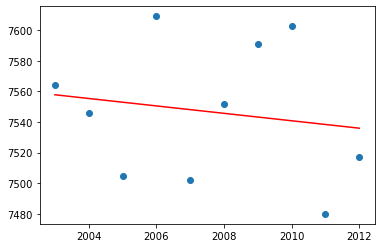

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.026373501556219536

In [92]:
all_act_2012_res_p65_greater_slope = model.coef_
all_act_2012_res_p65_greater_slope

array([[-2.42595348]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p65_greater_hpd, all_act_2004_res_p65_greater_hpd, all_act_2005_res_p65_greater_hpd,
                                   all_act_2006_res_p65_greater_hpd, all_act_2007_res_p65_greater_hpd, all_act_2008_res_p65_greater_hpd,
                                   all_act_2009_res_p65_greater_hpd, all_act_2010_res_p65_greater_hpd, all_act_2011_res_p65_greater_hpd,
                                   all_act_2012_res_p65_greater_hpd, all_act_2013_res_p65_greater_hpd, all_act_2014_res_p65_greater_hpd,
                                   all_act_2015_res_p65_greater_hpd, all_act_2016_res_p65_greater_hpd, all_act_2017_res_p65_greater_hpd,
                                   all_act_2018_res_p65_greater_hpd, all_act_2019_res_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

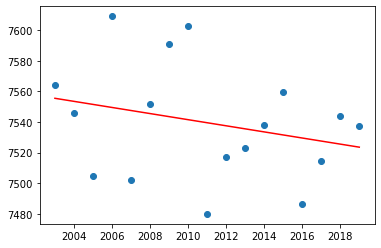

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.070450018555126

In [96]:
all_act_2019_res_p65_greater_slope = model.coef_
all_act_2019_res_p65_greater_slope

array([[-1.99588537]])

### 2003-2019 NonResidential - Age Between 65 or Greater 

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_p65_greater = multi_merged_p65_greater[multi_merged_p65_greater["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_p65_greater

In [99]:
atus_2003_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_p65_greater = atus_multi_yr_nonres_p65_greater[atus_multi_yr_nonres_p65_greater["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_p65_greater

### 2003 All Activities - NonResidential - Age Between 65 or Greater 

In [100]:
atus_2003_all_nonres_p65_greater = atus_2003_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_p65_greater

In [101]:
atus_2003_all_nonres_p65_greater_merge = pd.merge(atus_2003_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_p65_greater_merge

In [102]:
atus_2003_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2003_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2003_all_nonres_p65_greater_merge["TUFNWGTP"]
#atus_2003_all_nonres_p65_greater_merge

In [103]:
atus_2003_all_nonres_p65_greater_multiplied_weight = atus_2003_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_p65_greater_multiplied_weight

1753868942052.8906

In [104]:
all_act_2003_nonres_p65_greater_hpd = atus_2003_all_nonres_p65_greater_multiplied_weight / atus_2003_p65_greater_weight / 60
all_act_2003_nonres_p65_greater_hpd

2.3379885623602457

### 2004 All Activities - NonResidential - Age Between 65 or Greater 

In [105]:
atus_2004_all_nonres_p65_greater = atus_2004_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_p65_greater

In [106]:
atus_2004_all_nonres_p65_greater_merge = pd.merge(atus_2004_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_p65_greater_merge

In [107]:
atus_2004_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2004_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2004_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2004_all_nonres_p65_greater_multiplied_weight = atus_2004_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_p65_greater_multiplied_weight

1808054330113.702

In [108]:
all_act_2004_nonres_p65_greater_hpd = atus_2004_all_nonres_p65_greater_multiplied_weight / atus_2004_p65_greater_weight / 60
all_act_2004_nonres_p65_greater_hpd

2.3788817237904074

### 2005 All Activities - NonResidential - Age Between 65 or Greater 

In [109]:
atus_2005_all_nonres_p65_greater = atus_2005_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_p65_greater

In [110]:
atus_2005_all_nonres_p65_greater_merge = pd.merge(atus_2005_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_p65_greater_merge

In [111]:
atus_2005_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2005_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2005_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2005_all_nonres_p65_greater_multiplied_weight = atus_2005_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_p65_greater_multiplied_weight

1884767196667.518

In [112]:
all_act_2005_nonres_p65_greater_hpd = atus_2005_all_nonres_p65_greater_multiplied_weight / atus_2005_p65_greater_weight / 60
all_act_2005_nonres_p65_greater_hpd

2.4536537314779157

### 2006 All Activities - NonResidential - Age Between 65 or Greater 

In [113]:
atus_2006_all_nonres_p65_greater = atus_2006_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_p65_greater

In [114]:
atus_2006_all_nonres_p65_greater_merge = pd.merge(atus_2006_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_p65_greater_merge

In [115]:
atus_2006_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2006_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2006_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2006_all_nonres_p65_greater_multiplied_weight = atus_2006_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_p65_greater_multiplied_weight

1765880718629.0234

In [116]:
all_act_2006_nonres_p65_greater_hpd = atus_2006_all_nonres_p65_greater_multiplied_weight / atus_2006_p65_greater_weight / 60
all_act_2006_nonres_p65_greater_hpd

2.264521999013785

### 2007 All Activities - NonResidential - Age Between 65 or Greater 

In [117]:
atus_2007_all_nonres_p65_greater = atus_2007_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_p65_greater

In [118]:
atus_2007_all_nonres_p65_greater_merge = pd.merge(atus_2007_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_p65_greater_merge

In [119]:
atus_2007_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2007_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2007_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2007_all_nonres_p65_greater_multiplied_weight = atus_2007_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_p65_greater_multiplied_weight

1994803418268.9028

In [120]:
all_act_2007_nonres_p65_greater_hpd = atus_2007_all_nonres_p65_greater_multiplied_weight / atus_2007_p65_greater_weight / 60
all_act_2007_nonres_p65_greater_hpd

2.5145161549563273

### 2008 All Activities - NonResidential - Age Between 65 or Greater 

In [121]:
atus_2008_all_nonres_p65_greater = atus_2008_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_p65_greater

In [122]:
atus_2008_all_nonres_p65_greater_merge = pd.merge(atus_2008_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_p65_greater_merge

In [123]:
atus_2008_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2008_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2008_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2008_all_nonres_p65_greater_multiplied_weight = atus_2008_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_p65_greater_multiplied_weight

1933134377758.2808

In [124]:
all_act_2008_nonres_p65_greater_hpd = atus_2008_all_nonres_p65_greater_multiplied_weight / atus_2008_p65_greater_weight / 60
all_act_2008_nonres_p65_greater_hpd

2.3687357417751125

### 2009 All Activities - NonResidential - Age Between 65 or Greater 

In [125]:
atus_2009_all_nonres_p65_greater = atus_2009_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_p65_greater

In [126]:
atus_2009_all_nonres_p65_greater_merge = pd.merge(atus_2009_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_p65_greater_merge

In [127]:
atus_2009_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2009_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2009_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2009_all_nonres_p65_greater_multiplied_weight = atus_2009_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_p65_greater_multiplied_weight

1937404202430.4937

In [128]:
all_act_2009_nonres_p65_greater_hpd = atus_2009_all_nonres_p65_greater_multiplied_weight / atus_2009_p65_greater_weight / 60
all_act_2009_nonres_p65_greater_hpd

2.3283952993237422

### 2010 All Activities - NonResidential - Age Between 65 or Greater 

In [129]:
atus_2010_all_nonres_p65_greater = atus_2010_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_p65_greater

In [130]:
atus_2010_all_nonres_p65_greater_merge = pd.merge(atus_2010_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_p65_greater_merge

In [131]:
atus_2010_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2010_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2010_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2010_all_nonres_p65_greater_multiplied_weight = atus_2010_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_p65_greater_multiplied_weight

1954239265669.1294

In [132]:
all_act_2010_nonres_p65_greater_hpd = atus_2010_all_nonres_p65_greater_multiplied_weight / atus_2010_p65_greater_weight / 60
all_act_2010_nonres_p65_greater_hpd

2.305766716418869

### 2011 All Activities - NonResidential - Age Between 65 or Greater 

In [133]:
atus_2011_all_nonres_p65_greater = atus_2011_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_p65_greater

In [134]:
atus_2011_all_nonres_p65_greater_merge = pd.merge(atus_2011_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_p65_greater_merge

In [135]:
atus_2011_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2011_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2011_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2011_all_nonres_p65_greater_multiplied_weight = atus_2011_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_p65_greater_multiplied_weight

2224907297515.203

In [136]:
all_act_2011_nonres_p65_greater_hpd = atus_2011_all_nonres_p65_greater_multiplied_weight / atus_2011_p65_greater_weight / 60
all_act_2011_nonres_p65_greater_hpd

2.557657683883724

### 2012 All Activities - NonResidential - Age Between 65 or Greater 

In [137]:
atus_2012_all_nonres_p65_greater = atus_2012_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_p65_greater

In [138]:
atus_2012_all_nonres_p65_greater_merge = pd.merge(atus_2012_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_p65_greater_merge

In [139]:
atus_2012_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2012_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2012_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2012_all_nonres_p65_greater_multiplied_weight = atus_2012_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_p65_greater_multiplied_weight

2308641878644.29

In [140]:
all_act_2012_nonres_p65_greater_hpd = atus_2012_all_nonres_p65_greater_multiplied_weight / atus_2012_p65_greater_weight / 60
all_act_2012_nonres_p65_greater_hpd

2.5108299194964596

### 2013 All Activities - NonResidential - Age Between 65 or Greater 

In [141]:
atus_2013_all_nonres_p65_greater = atus_2013_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_p65_greater

In [142]:
atus_2013_all_nonres_p65_greater_merge = pd.merge(atus_2013_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_p65_greater_merge

In [143]:
atus_2013_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2013_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2013_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2013_all_nonres_p65_greater_multiplied_weight = atus_2013_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_p65_greater_multiplied_weight

2324122440665.597

In [144]:
all_act_2013_nonres_p65_greater_hpd = atus_2013_all_nonres_p65_greater_multiplied_weight / atus_2013_p65_greater_weight / 60
all_act_2013_nonres_p65_greater_hpd

2.4443771591734182

### 2014 All Activities - NonResidential - Age Between 65 or Greater 

In [145]:
atus_2014_all_nonres_p65_greater = atus_2014_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_p65_greater

In [146]:
atus_2014_all_nonres_p65_greater_merge = pd.merge(atus_2014_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_p65_greater_merge

In [147]:
atus_2014_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2014_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2014_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2014_all_nonres_p65_greater_multiplied_weight = atus_2014_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_p65_greater_multiplied_weight

2430336889094.517

In [148]:
all_act_2014_nonres_p65_greater_hpd = atus_2014_all_nonres_p65_greater_multiplied_weight / atus_2014_p65_greater_weight / 60
all_act_2014_nonres_p65_greater_hpd

2.4681105839749757

### 2015 All Activities - NonResidential - Age Between 65 or Greater 

In [149]:
atus_2015_all_nonres_p65_greater = atus_2015_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_p65_greater

In [150]:
atus_2015_all_nonres_p65_greater_merge = pd.merge(atus_2015_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_p65_greater_merge

In [151]:
atus_2015_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2015_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2015_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2015_all_nonres_p65_greater_multiplied_weight = atus_2015_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_p65_greater_multiplied_weight

2460845131760.8945

In [152]:
all_act_2015_nonres_p65_greater_hpd = atus_2015_all_nonres_p65_greater_multiplied_weight / atus_2015_p65_greater_weight / 60
all_act_2015_nonres_p65_greater_hpd

2.4159690989846

### 2016 All Activities - NonResidential - Age Between 65 or Greater 

In [153]:
atus_2016_all_nonres_p65_greater = atus_2016_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_p65_greater

In [154]:
atus_2016_all_nonres_p65_greater_merge = pd.merge(atus_2016_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_p65_greater_merge

In [155]:
atus_2016_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2016_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2016_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2016_all_nonres_p65_greater_multiplied_weight = atus_2016_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_p65_greater_multiplied_weight

2662911316886.4775

In [156]:
all_act_2016_nonres_p65_greater_hpd = atus_2016_all_nonres_p65_greater_multiplied_weight / atus_2016_p65_greater_weight / 60
all_act_2016_nonres_p65_greater_hpd

2.524695364661431

### 2017 All Activities - NonResidential - Age Between 65 or Greater 

In [157]:
atus_2017_all_nonres_p65_greater = atus_2017_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_p65_greater

In [158]:
atus_2017_all_nonres_p65_greater_merge = pd.merge(atus_2017_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_p65_greater_merge

In [159]:
atus_2017_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2017_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2017_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2017_all_nonres_p65_greater_multiplied_weight = atus_2017_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_p65_greater_multiplied_weight

2656832790187.8145

In [160]:
all_act_2017_nonres_p65_greater_hpd = atus_2017_all_nonres_p65_greater_multiplied_weight / atus_2017_p65_greater_weight / 60
all_act_2017_nonres_p65_greater_hpd

2.44861969947232

### 2018 All Activities - NonResidential - Age Between 65 or Greater 

In [161]:
atus_2018_all_nonres_p65_greater = atus_2018_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_p65_greater

In [162]:
atus_2018_all_nonres_p65_greater_merge = pd.merge(atus_2018_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_p65_greater_merge

In [163]:
atus_2018_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2018_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2018_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2018_all_nonres_p65_greater_multiplied_weight = atus_2018_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_p65_greater_multiplied_weight

2659526517118.927

In [164]:
all_act_2018_nonres_p65_greater_hpd = atus_2018_all_nonres_p65_greater_multiplied_weight / atus_2018_p65_greater_weight / 60
all_act_2018_nonres_p65_greater_hpd

2.367755021575059

### 2019 All Activities - NonResidential - Age Between 65 or Greater 

In [165]:
atus_2019_all_nonres_p65_greater = atus_2019_nonres_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_p65_greater

In [166]:
atus_2019_all_nonres_p65_greater_merge = pd.merge(atus_2019_all_nonres_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_p65_greater_merge

In [167]:
atus_2019_all_nonres_p65_greater_merge["Multiplied Weight"]=atus_2019_all_nonres_p65_greater_merge["TUACTDUR24"]*atus_2019_all_nonres_p65_greater_merge["TUFNWGTP"]

atus_2019_all_nonres_p65_greater_multiplied_weight = atus_2019_all_nonres_p65_greater_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_p65_greater_multiplied_weight

2754551822535.2803

In [168]:
all_act_2019_nonres_p65_greater_hpd = atus_2019_all_nonres_p65_greater_multiplied_weight / atus_2019_p65_greater_weight / 60
all_act_2019_nonres_p65_greater_hpd

2.3771938387317064

### Regresssion: All Activities - NonResidential - Age Between 65 or Greater 

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p65_greater_hpd, all_act_2004_nonres_p65_greater_hpd, all_act_2005_nonres_p65_greater_hpd,
                                   all_act_2006_nonres_p65_greater_hpd, all_act_2007_nonres_p65_greater_hpd, all_act_2008_nonres_p65_greater_hpd,
                                   all_act_2009_nonres_p65_greater_hpd, all_act_2010_nonres_p65_greater_hpd, all_act_2011_nonres_p65_greater_hpd,
                                   all_act_2012_nonres_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

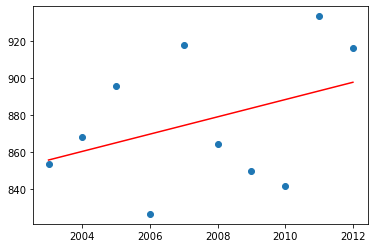

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.14919628531844575

In [172]:
all_act_2012_nonres_p65_greater_slope = model.coef_
all_act_2012_nonres_p65_greater_slope

array([[4.67511544]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p65_greater_hpd, all_act_2004_nonres_p65_greater_hpd, all_act_2005_nonres_p65_greater_hpd,
                                   all_act_2006_nonres_p65_greater_hpd, all_act_2007_nonres_p65_greater_hpd, all_act_2008_nonres_p65_greater_hpd,
                                   all_act_2009_nonres_p65_greater_hpd, all_act_2010_nonres_p65_greater_hpd, all_act_2011_nonres_p65_greater_hpd,
                                   all_act_2012_nonres_p65_greater_hpd, all_act_2013_nonres_p65_greater_hpd, all_act_2014_nonres_p65_greater_hpd,
                                   all_act_2015_nonres_p65_greater_hpd, all_act_2016_nonres_p65_greater_hpd, all_act_2017_nonres_p65_greater_hpd,
                                   all_act_2018_nonres_p65_greater_hpd, all_act_2019_nonres_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

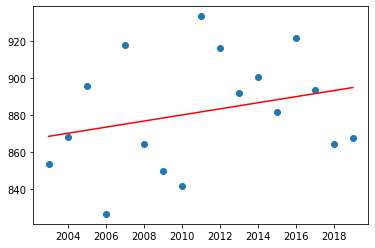

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.07410054810517863

In [176]:
all_act_2019_nonres_p65_greater_slope = model.coef_
all_act_2019_nonres_p65_greater_slope

array([[1.65268167]])

## 2003-2019 Transportation - Age Between 65 or Greater 

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_p65_greater = multi_merged_p65_greater[multi_merged_p65_greater["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_p65_greater

In [179]:
#atus transportation p65_greater population seperated by year
atus_2003_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_p65_greater = atus_multi_yr_tran_p65_greater[atus_multi_yr_tran_p65_greater["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_p65_greater

In [180]:
atus_2003_tran_p65_greater = atus_2003_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_p65_greater

In [181]:
atus_2003_tran_p65_greater_merge = pd.merge(atus_2003_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_p65_greater_merge

In [182]:
atus_2003_tran_p65_greater_merge["Multiplied Weight"] = atus_2003_tran_p65_greater_merge["TUACTDUR24"] * atus_2003_tran_p65_greater_merge["TUFNWGTP"]
#atus_2003_tran_p65_greater_merge

In [183]:
atus_2003_tran_p65_greater_multiplied_weight = atus_2003_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2003_tran_p65_greater_multiplied_weight

610165911846.4021

In [184]:
atus_2003_tran_p65_greater_hpd = atus_2003_tran_p65_greater_multiplied_weight / atus_2003_p65_greater_weight / 60
atus_2003_tran_p65_greater_hpd

0.8133794315151159

### 2004 Transportation

In [185]:
atus_2004_tran_p65_greater = atus_2004_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_p65_greater_merge = pd.merge(atus_2004_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_p65_greater_merge

In [186]:
atus_2004_tran_p65_greater_merge["Multiplied Weight"] = atus_2004_tran_p65_greater_merge["TUACTDUR24"] * atus_2004_tran_p65_greater_merge["TUFNWGTP"]
atus_2004_tran_p65_greater_multiplied_weight = atus_2004_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2004_tran_p65_greater_multiplied_weight

651618961851.6833

In [187]:
atus_2004_tran_p65_greater_hpd = atus_2004_tran_p65_greater_multiplied_weight / atus_2004_p65_greater_weight / 60
atus_2004_tran_p65_greater_hpd

0.8573439489104104

### 2005 Transportation

In [188]:
atus_2005_tran_p65_greater = atus_2005_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_p65_greater_merge = pd.merge(atus_2005_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_p65_greater_merge

In [189]:
atus_2005_tran_p65_greater_merge["Multiplied Weight"] = atus_2005_tran_p65_greater_merge["TUACTDUR24"] * atus_2005_tran_p65_greater_merge["TUFNWGTP"]
atus_2005_tran_p65_greater_multiplied_weight = atus_2005_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2005_tran_p65_greater_multiplied_weight

666496224931.4999

In [190]:
atus_2005_tran_p65_greater_hpd = atus_2005_tran_p65_greater_multiplied_weight / atus_2005_p65_greater_weight / 60
atus_2005_tran_p65_greater_hpd

0.867667344916977

### 2006 Transportation

In [191]:
atus_2006_tran_p65_greater = atus_2006_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_p65_greater_merge = pd.merge(atus_2006_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_p65_greater_merge

In [192]:
atus_2006_tran_p65_greater_merge["Multiplied Weight"] = atus_2006_tran_p65_greater_merge["TUACTDUR24"] * atus_2006_tran_p65_greater_merge["TUFNWGTP"]
atus_2006_tran_p65_greater_multiplied_weight = atus_2006_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2006_tran_p65_greater_multiplied_weight

623389199057.0707

In [193]:
atus_2006_tran_p65_greater_hpd = atus_2006_tran_p65_greater_multiplied_weight / atus_2006_p65_greater_weight / 60
atus_2006_tran_p65_greater_hpd

0.7994189756532959

### 2007 Transportation

In [194]:
atus_2007_tran_p65_greater = atus_2007_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_p65_greater_merge = pd.merge(atus_2007_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_p65_greater_merge

In [195]:
atus_2007_tran_p65_greater_merge["Multiplied Weight"] = atus_2007_tran_p65_greater_merge["TUACTDUR24"] * atus_2007_tran_p65_greater_merge["TUFNWGTP"]
atus_2007_tran_p65_greater_multiplied_weight = atus_2007_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2007_tran_p65_greater_multiplied_weight

670832789133.789

In [196]:
atus_2007_tran_p65_greater_hpd = atus_2007_tran_p65_greater_multiplied_weight / atus_2007_p65_greater_weight / 60
atus_2007_tran_p65_greater_hpd

0.8456070759168599

### 2008 Transportation

In [197]:
atus_2008_tran_p65_greater = atus_2008_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_p65_greater_merge = pd.merge(atus_2008_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_p65_greater_merge

In [198]:
atus_2008_tran_p65_greater_merge["Multiplied Weight"] = atus_2008_tran_p65_greater_merge["TUACTDUR24"] * atus_2008_tran_p65_greater_merge["TUFNWGTP"]
atus_2008_tran_p65_greater_multiplied_weight = atus_2008_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2008_tran_p65_greater_multiplied_weight

678583679162.3057

In [199]:
atus_2008_tran_p65_greater_hpd = atus_2008_tran_p65_greater_multiplied_weight / atus_2008_p65_greater_weight / 60
atus_2008_tran_p65_greater_hpd

0.8314918161462631

### 2009 Transportation

In [200]:
atus_2009_tran_p65_greater = atus_2009_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_p65_greater_merge = pd.merge(atus_2009_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_p65_greater_merge

In [201]:
atus_2009_tran_p65_greater_merge["Multiplied Weight"] = atus_2009_tran_p65_greater_merge["TUACTDUR24"] * atus_2009_tran_p65_greater_merge["TUFNWGTP"]
atus_2009_tran_p65_greater_multiplied_weight = atus_2009_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2009_tran_p65_greater_multiplied_weight

649791030324.7933

In [202]:
atus_2009_tran_p65_greater_hpd = atus_2009_tran_p65_greater_multiplied_weight / atus_2009_p65_greater_weight / 60
atus_2009_tran_p65_greater_hpd

0.7809265504085018

### 2010 Transportation

In [203]:
atus_2010_tran_p65_greater = atus_2010_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_p65_greater_merge = pd.merge(atus_2010_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_p65_greater_merge

In [204]:
atus_2010_tran_p65_greater_merge["Multiplied Weight"] = atus_2010_tran_p65_greater_merge["TUACTDUR24"] * atus_2010_tran_p65_greater_merge["TUFNWGTP"]
atus_2010_tran_p65_greater_multiplied_weight = atus_2010_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2010_tran_p65_greater_multiplied_weight

652146711707.5493

In [205]:
atus_2010_tran_p65_greater_hpd = atus_2010_tran_p65_greater_multiplied_weight / atus_2010_p65_greater_weight / 60
atus_2010_tran_p65_greater_hpd

0.7694544923404832

### 2011 Transportation

In [206]:
atus_2011_tran_p65_greater = atus_2011_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_p65_greater_merge = pd.merge(atus_2011_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_p65_greater_merge

In [207]:
atus_2011_tran_p65_greater_merge["Multiplied Weight"] = atus_2011_tran_p65_greater_merge["TUACTDUR24"] * atus_2011_tran_p65_greater_merge["TUFNWGTP"]
atus_2011_tran_p65_greater_multiplied_weight = atus_2011_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2011_tran_p65_greater_multiplied_weight

738225404285.7114

In [208]:
atus_2011_tran_p65_greater_hpd = atus_2011_tran_p65_greater_multiplied_weight / atus_2011_p65_greater_weight / 60
atus_2011_tran_p65_greater_hpd

0.8486321564130771

### 2012 Transportation

In [209]:
atus_2012_tran_p65_greater = atus_2012_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_p65_greater_merge = pd.merge(atus_2012_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_p65_greater_merge

In [210]:
atus_2012_tran_p65_greater_merge["Multiplied Weight"] = atus_2012_tran_p65_greater_merge["TUACTDUR24"] * atus_2012_tran_p65_greater_merge["TUFNWGTP"]
atus_2012_tran_p65_greater_multiplied_weight = atus_2012_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2012_tran_p65_greater_multiplied_weight

754843003968.5518

In [211]:
atus_2012_tran_p65_greater_hpd = atus_2012_tran_p65_greater_multiplied_weight / atus_2012_p65_greater_weight / 60
atus_2012_tran_p65_greater_hpd

0.8209512338915884

### 2013 Transportation

In [212]:
atus_2013_tran_p65_greater = atus_2013_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_p65_greater_merge = pd.merge(atus_2013_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_p65_greater_merge

In [213]:
atus_2013_tran_p65_greater_merge["Multiplied Weight"] = atus_2013_tran_p65_greater_merge["TUACTDUR24"] * atus_2013_tran_p65_greater_merge["TUFNWGTP"]
atus_2013_tran_p65_greater_multiplied_weight = atus_2013_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2013_tran_p65_greater_multiplied_weight

808934862240.0522

In [214]:
atus_2013_tran_p65_greater_hpd = atus_2013_tran_p65_greater_multiplied_weight / atus_2013_p65_greater_weight / 60
atus_2013_tran_p65_greater_hpd

0.8507907612442291

### 2014 Transportation

In [215]:
atus_2014_tran_p65_greater = atus_2014_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_p65_greater_merge = pd.merge(atus_2014_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_p65_greater_merge

In [216]:
atus_2014_tran_p65_greater_merge["Multiplied Weight"] = atus_2014_tran_p65_greater_merge["TUACTDUR24"] * atus_2014_tran_p65_greater_merge["TUFNWGTP"]
atus_2014_tran_p65_greater_multiplied_weight = atus_2014_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2014_tran_p65_greater_multiplied_weight

762069508366.5197

In [217]:
atus_2014_tran_p65_greater_hpd = atus_2014_tran_p65_greater_multiplied_weight / atus_2014_p65_greater_weight / 60
atus_2014_tran_p65_greater_hpd

0.7739140313278869

### 2015 Transportation

In [218]:
atus_2015_tran_p65_greater = atus_2015_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_p65_greater_merge = pd.merge(atus_2015_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_p65_greater_merge

In [219]:
atus_2015_tran_p65_greater_merge["Multiplied Weight"] = atus_2015_tran_p65_greater_merge["TUACTDUR24"] * atus_2015_tran_p65_greater_merge["TUFNWGTP"]
atus_2015_tran_p65_greater_multiplied_weight = atus_2015_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2015_tran_p65_greater_multiplied_weight

804168591334.6383

In [220]:
atus_2015_tran_p65_greater_hpd = atus_2015_tran_p65_greater_multiplied_weight / atus_2015_p65_greater_weight / 60
atus_2015_tran_p65_greater_hpd

0.7895037529843368

### 2016 Transportation

In [221]:
atus_2016_tran_p65_greater = atus_2016_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_p65_greater_merge = pd.merge(atus_2016_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_p65_greater_merge

In [222]:
atus_2016_tran_p65_greater_merge["Multiplied Weight"] = atus_2016_tran_p65_greater_merge["TUACTDUR24"] * atus_2016_tran_p65_greater_merge["TUFNWGTP"]
atus_2016_tran_p65_greater_multiplied_weight = atus_2016_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2016_tran_p65_greater_multiplied_weight

922705328905.0587

In [223]:
atus_2016_tran_p65_greater_hpd = atus_2016_tran_p65_greater_multiplied_weight / atus_2016_p65_greater_weight / 60
atus_2016_tran_p65_greater_hpd

0.8748131610927071

### 2017 Transportation

In [224]:
atus_2017_tran_p65_greater = atus_2017_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_p65_greater_merge = pd.merge(atus_2017_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_p65_greater_merge

In [225]:
atus_2017_tran_p65_greater_merge["Multiplied Weight"] = atus_2017_tran_p65_greater_merge["TUACTDUR24"] * atus_2017_tran_p65_greater_merge["TUFNWGTP"]
atus_2017_tran_p65_greater_multiplied_weight = atus_2017_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2017_tran_p65_greater_multiplied_weight

953545122989.3162

In [226]:
atus_2017_tran_p65_greater_hpd = atus_2017_tran_p65_greater_multiplied_weight / atus_2017_p65_greater_weight / 60
atus_2017_tran_p65_greater_hpd

0.8788168307431727

### 2018 Transportation

In [227]:
atus_2018_tran_p65_greater = atus_2018_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_p65_greater_merge = pd.merge(atus_2018_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_p65_greater_merge

In [228]:
atus_2018_tran_p65_greater_merge["Multiplied Weight"] = atus_2018_tran_p65_greater_merge["TUACTDUR24"] * atus_2018_tran_p65_greater_merge["TUFNWGTP"]
atus_2018_tran_p65_greater_multiplied_weight = atus_2018_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2018_tran_p65_greater_multiplied_weight

954260585912.9448

In [229]:
atus_2018_tran_p65_greater_hpd = atus_2018_tran_p65_greater_multiplied_weight / atus_2018_p65_greater_weight / 60
atus_2018_tran_p65_greater_hpd

0.8495705079993743

### 2019 Transportation

In [230]:
atus_2019_tran_p65_greater = atus_2019_tran_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_p65_greater_merge = pd.merge(atus_2019_tran_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_p65_greater_merge

In [231]:
atus_2019_tran_p65_greater_merge["Multiplied Weight"] = atus_2019_tran_p65_greater_merge["TUACTDUR24"] * atus_2019_tran_p65_greater_merge["TUFNWGTP"]
atus_2019_tran_p65_greater_multiplied_weight = atus_2019_tran_p65_greater_merge["Multiplied Weight"].sum()
atus_2019_tran_p65_greater_multiplied_weight

991651238048.5181

In [232]:
atus_2019_tran_p65_greater_hpd = atus_2019_tran_p65_greater_multiplied_weight / atus_2019_p65_greater_weight / 60
atus_2019_tran_p65_greater_hpd

0.855800640225353

### Regresssion: Transportation - Age Between 65 or Greater 

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p65_greater_hpd, atus_2004_tran_p65_greater_hpd, atus_2005_tran_p65_greater_hpd,
                                   atus_2006_tran_p65_greater_hpd, atus_2007_tran_p65_greater_hpd, atus_2008_tran_p65_greater_hpd,
                                   atus_2009_tran_p65_greater_hpd, atus_2010_tran_p65_greater_hpd, atus_2011_tran_p65_greater_hpd,
                                   atus_2012_tran_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

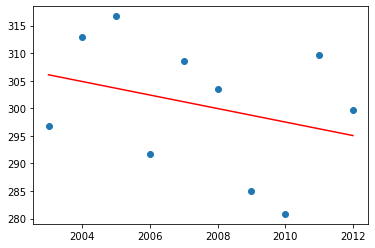

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.09568011056429382

In [236]:
tran_2012_p65_greater_slope = model.coef_
tran_2012_p65_greater_slope

array([[-1.22439388]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p65_greater_hpd, atus_2004_tran_p65_greater_hpd, atus_2005_tran_p65_greater_hpd,
                                   atus_2006_tran_p65_greater_hpd, atus_2007_tran_p65_greater_hpd, atus_2008_tran_p65_greater_hpd,
                                   atus_2009_tran_p65_greater_hpd, atus_2010_tran_p65_greater_hpd, atus_2011_tran_p65_greater_hpd,
                                   atus_2012_tran_p65_greater_hpd, atus_2013_tran_p65_greater_hpd, atus_2014_tran_p65_greater_hpd,
                                   atus_2015_tran_p65_greater_hpd, atus_2016_tran_p65_greater_hpd, atus_2017_tran_p65_greater_hpd,
                                   atus_2018_tran_p65_greater_hpd, atus_2019_tran_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

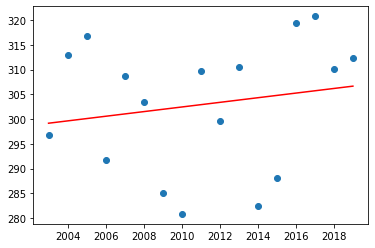

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03224359670688837

In [240]:
tran_2019_p65_greater_slope = model.coef_
tran_2019_p65_greater_slope

array([[0.46779218]])

### 2003-2019 - Unspecified- Age Between 65 or Greater 

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_p65_greater = multi_merged_p65_greater[multi_merged_p65_greater["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_p65_greater

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
3075,20030101032209,10,400,13,1301,130131,89,78,7.554146e+06,10:30:00,10:40:00,2003
3588,20030101032616,10,750,04,0405,040508,89,65,1.387219e+06,16:20:00,16:30:00,2003
11079,20030112020527,40,855,13,1301,130131,89,68,3.458008e+06,17:35:00,18:15:00,2003
16024,20030112021166,1,158,04,0405,040507,89,73,7.191578e+06,06:37:00,06:38:00,2003
16036,20030112021166,5,750,04,0405,040507,89,73,7.191578e+06,16:25:00,16:30:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4119063,20191212190533,45,1035,13,1301,130131,89,76,5.368955e+06,20:30:00,21:15:00,2019
4120048,20191212191450,41,448,04,0405,040508,89,68,2.445740e+06,10:47:00,11:28:00,2019
4120912,20191212191980,12,422,03,0305,030504,89,67,1.975811e+07,10:50:00,11:02:00,2019
4120914,20191212191980,10,437,03,0305,030504,89,67,1.975811e+07,11:07:00,11:17:00,2019


In [243]:
#atus transportation p65_greater population seperated by year
#unsp = unspecified
atus_2003_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_p65_greater = atus_multi_yr_unsp_p65_greater[atus_multi_yr_unsp_p65_greater["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_p65_greater
#atus_2004_unsp_p65_greater["TRCODEP"]

### 2003 Unspecified- Age Between 65 or Greater 

In [244]:
atus_2003_unsp_p65_greater = atus_2003_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_p65_greater

In [245]:
atus_2003_unsp_p65_greater_merge = pd.merge(atus_2003_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_p65_greater_merge

In [246]:
atus_2003_unsp_p65_greater_merge["Multiplied Weight"] = atus_2003_unsp_p65_greater_merge["TUACTDUR24"] * atus_2003_unsp_p65_greater_merge["TUFNWGTP"]
#atus_2003_unsp_p65_greater_merge

In [247]:
atus_2003_unsp_p65_greater_multiplied_weight = atus_2003_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2003_unsp_p65_greater_multiplied_weight

21728505483.339104

In [248]:
atus_2003_unsp_p65_greater_hpd = atus_2003_unsp_p65_greater_multiplied_weight / atus_2003_p65_greater_weight / 60
atus_2003_unsp_p65_greater_hpd

0.028965104563495214

### 2004 Unspecified- Age Between 65 or Greater 

In [249]:
atus_2004_unsp_p65_greater = atus_2004_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_p65_greater

In [250]:
atus_2004_unsp_p65_greater_merge = pd.merge(atus_2004_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_p65_greater_merge["Multiplied Weight"] = atus_2004_unsp_p65_greater_merge["TUACTDUR24"] * atus_2004_unsp_p65_greater_merge["TUFNWGTP"]

atus_2004_unsp_p65_greater_multiplied_weight = atus_2004_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2004_unsp_p65_greater_multiplied_weight

17618673156.696

In [251]:
atus_2004_unsp_p65_greater_hpd = atus_2004_unsp_p65_greater_multiplied_weight / atus_2004_p65_greater_weight / 60
atus_2004_unsp_p65_greater_hpd

0.02318112839411469

### 2005 Unspecified- Age Between 65 or Greater 

In [252]:
atus_2005_unsp_p65_greater = atus_2005_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_p65_greater

In [253]:
atus_2005_unsp_p65_greater_merge = pd.merge(atus_2005_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_p65_greater_merge["Multiplied Weight"] = atus_2005_unsp_p65_greater_merge["TUACTDUR24"] * atus_2005_unsp_p65_greater_merge["TUFNWGTP"]

atus_2005_unsp_p65_greater_multiplied_weight = atus_2005_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2005_unsp_p65_greater_multiplied_weight

14878814135.03657

In [254]:
atus_2005_unsp_p65_greater_hpd = atus_2005_unsp_p65_greater_multiplied_weight / atus_2005_p65_greater_weight / 60
atus_2005_unsp_p65_greater_hpd

0.019369743853218668

### 2006 Unspecified- Age Between 65 or Greater 

In [255]:
atus_2006_unsp_p65_greater = atus_2006_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_p65_greater

In [256]:
atus_2006_unsp_p65_greater_merge = pd.merge(atus_2006_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_p65_greater_merge["Multiplied Weight"] = atus_2006_unsp_p65_greater_merge["TUACTDUR24"] * atus_2006_unsp_p65_greater_merge["TUFNWGTP"]

atus_2006_unsp_p65_greater_multiplied_weight = atus_2006_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2006_unsp_p65_greater_multiplied_weight

12879066146.993938

In [257]:
atus_2006_unsp_p65_greater_hpd = atus_2006_unsp_p65_greater_multiplied_weight / atus_2006_p65_greater_weight / 60
atus_2006_unsp_p65_greater_hpd

0.01651579764643687

### 2007 Unspecified- Age Between 65 or Greater 

In [258]:
atus_2007_unsp_p65_greater = atus_2007_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_p65_greater

In [259]:
atus_2007_unsp_p65_greater_merge = pd.merge(atus_2007_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_p65_greater_merge["Multiplied Weight"] = atus_2007_unsp_p65_greater_merge["TUACTDUR24"] * atus_2007_unsp_p65_greater_merge["TUFNWGTP"]

atus_2007_unsp_p65_greater_multiplied_weight = atus_2007_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2007_unsp_p65_greater_multiplied_weight

19164573999.691372

In [260]:
atus_2007_unsp_p65_greater_hpd = atus_2007_unsp_p65_greater_multiplied_weight / atus_2007_p65_greater_weight / 60
atus_2007_unsp_p65_greater_hpd

0.024157583892100546

### 2008 Unspecified- Age Between 65 or Greater 

In [261]:
atus_2008_unsp_p65_greater = atus_2008_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_p65_greater

In [262]:
atus_2008_unsp_p65_greater_merge = pd.merge(atus_2008_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_p65_greater_merge["Multiplied Weight"] = atus_2008_unsp_p65_greater_merge["TUACTDUR24"] * atus_2008_unsp_p65_greater_merge["TUFNWGTP"]

atus_2008_unsp_p65_greater_multiplied_weight = atus_2008_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2008_unsp_p65_greater_multiplied_weight

22209072723.055534

In [263]:
atus_2008_unsp_p65_greater_hpd = atus_2008_unsp_p65_greater_multiplied_weight / atus_2008_p65_greater_weight / 60
atus_2008_unsp_p65_greater_hpd

0.027213537225378757

### 2009 Unspecified- Age Between 65 or Greater 

In [264]:
atus_2009_unsp_p65_greater = atus_2009_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_p65_greater

In [265]:
atus_2009_unsp_p65_greater_merge = pd.merge(atus_2009_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_p65_greater_merge["Multiplied Weight"] = atus_2009_unsp_p65_greater_merge["TUACTDUR24"] * atus_2009_unsp_p65_greater_merge["TUFNWGTP"]

atus_2009_unsp_p65_greater_multiplied_weight = atus_2009_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2009_unsp_p65_greater_multiplied_weight

13533459264.92886

In [266]:
atus_2009_unsp_p65_greater_hpd = atus_2009_unsp_p65_greater_multiplied_weight / atus_2009_p65_greater_weight / 60
atus_2009_unsp_p65_greater_hpd

0.016264671510735098

### 2010 Unspecified- Age Between 65 or Greater 

In [267]:
atus_2010_unsp_p65_greater = atus_2010_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_p65_greater

In [268]:
atus_2010_unsp_p65_greater_merge = pd.merge(atus_2010_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_p65_greater_merge["Multiplied Weight"] = atus_2010_unsp_p65_greater_merge["TUACTDUR24"] * atus_2010_unsp_p65_greater_merge["TUFNWGTP"]

atus_2010_unsp_p65_greater_multiplied_weight = atus_2010_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2010_unsp_p65_greater_multiplied_weight

21075613184.669777

In [269]:
atus_2010_unsp_p65_greater_hpd = atus_2010_unsp_p65_greater_multiplied_weight / atus_2010_p65_greater_weight / 60
atus_2010_unsp_p65_greater_hpd

0.024866682531164485

### 2011 Unspecified- Age Between 65 or Greater 

In [270]:
atus_2011_unsp_p65_greater = atus_2011_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_p65_greater

In [271]:
atus_2011_unsp_p65_greater_merge = pd.merge(atus_2011_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_p65_greater_merge["Multiplied Weight"] = atus_2011_unsp_p65_greater_merge["TUACTDUR24"] * atus_2011_unsp_p65_greater_merge["TUFNWGTP"]

atus_2011_unsp_p65_greater_multiplied_weight = atus_2011_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2011_unsp_p65_greater_multiplied_weight

13116337973.022018

In [272]:
atus_2011_unsp_p65_greater_hpd = atus_2011_unsp_p65_greater_multiplied_weight / atus_2011_p65_greater_weight / 60
atus_2011_unsp_p65_greater_hpd

0.015077977693084717

### 2012 Unspecified- Age Between 65 or Greater 

In [273]:
atus_2012_unsp_p65_greater = atus_2012_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_p65_greater

In [274]:
atus_2012_unsp_p65_greater_merge = pd.merge(atus_2012_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_p65_greater_merge["Multiplied Weight"] = atus_2012_unsp_p65_greater_merge["TUACTDUR24"] * atus_2012_unsp_p65_greater_merge["TUFNWGTP"]

atus_2012_unsp_p65_greater_multiplied_weight = atus_2012_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2012_unsp_p65_greater_multiplied_weight

12601183900.668644

In [275]:
atus_2012_unsp_p65_greater_hpd = atus_2012_unsp_p65_greater_multiplied_weight / atus_2012_p65_greater_weight / 60
atus_2012_unsp_p65_greater_hpd

0.01370478022232519

### 2013 Unspecified- Age Between 65 or Greater 

In [276]:
atus_2013_unsp_p65_greater = atus_2013_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_p65_greater

In [277]:
atus_2013_unsp_p65_greater_merge = pd.merge(atus_2013_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_p65_greater_merge["Multiplied Weight"] = atus_2013_unsp_p65_greater_merge["TUACTDUR24"] * atus_2013_unsp_p65_greater_merge["TUFNWGTP"]

atus_2013_unsp_p65_greater_multiplied_weight = atus_2013_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2013_unsp_p65_greater_multiplied_weight

10080252284.164478

In [278]:
atus_2013_unsp_p65_greater_hpd = atus_2013_unsp_p65_greater_multiplied_weight / atus_2013_p65_greater_weight / 60
atus_2013_unsp_p65_greater_hpd

0.010601824590214269

### 2014 Unspecified- Age Between 65 or Greater 

In [279]:
atus_2014_unsp_p65_greater = atus_2014_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_p65_greater

In [280]:
atus_2014_unsp_p65_greater_merge = pd.merge(atus_2014_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_p65_greater_merge["Multiplied Weight"] = atus_2014_unsp_p65_greater_merge["TUACTDUR24"] * atus_2014_unsp_p65_greater_merge["TUFNWGTP"]

atus_2014_unsp_p65_greater_multiplied_weight = atus_2014_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2014_unsp_p65_greater_multiplied_weight

12024409671.737837

In [281]:
atus_2014_unsp_p65_greater_hpd = atus_2014_unsp_p65_greater_multiplied_weight / atus_2014_p65_greater_weight / 60
atus_2014_unsp_p65_greater_hpd

0.012211299968344858

### 2015 Unspecified- Age Between 65 or Greater 

In [282]:
atus_2015_unsp_p65_greater = atus_2015_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_p65_greater

In [283]:
atus_2015_unsp_p65_greater_merge = pd.merge(atus_2015_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_p65_greater_merge["Multiplied Weight"] = atus_2015_unsp_p65_greater_merge["TUACTDUR24"] * atus_2015_unsp_p65_greater_merge["TUFNWGTP"]

atus_2015_unsp_p65_greater_multiplied_weight = atus_2015_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2015_unsp_p65_greater_multiplied_weight

12069808098.766085

In [284]:
atus_2015_unsp_p65_greater_hpd = atus_2015_unsp_p65_greater_multiplied_weight / atus_2015_p65_greater_weight / 60
atus_2015_unsp_p65_greater_hpd

0.011849702779315841

### 2016 Unspecified- Age Between 65 or Greater 

In [285]:
atus_2016_unsp_p65_greater = atus_2016_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_p65_greater

In [286]:
atus_2016_unsp_p65_greater_merge = pd.merge(atus_2016_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_p65_greater_merge["Multiplied Weight"] = atus_2016_unsp_p65_greater_merge["TUACTDUR24"] * atus_2016_unsp_p65_greater_merge["TUFNWGTP"]

atus_2016_unsp_p65_greater_multiplied_weight = atus_2016_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2016_unsp_p65_greater_multiplied_weight

12993429843.331766

In [287]:
atus_2016_unsp_p65_greater_hpd = atus_2016_unsp_p65_greater_multiplied_weight / atus_2016_p65_greater_weight / 60
atus_2016_unsp_p65_greater_hpd

0.012319017869085012

### 2017 Unspecified- Age Between 65 or Greater 

In [288]:
atus_2017_unsp_p65_greater = atus_2017_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_p65_greater

In [289]:
atus_2017_unsp_p65_greater_merge = pd.merge(atus_2017_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_p65_greater_merge["Multiplied Weight"] = atus_2017_unsp_p65_greater_merge["TUACTDUR24"] * atus_2017_unsp_p65_greater_merge["TUFNWGTP"]

atus_2017_unsp_p65_greater_multiplied_weight = atus_2017_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2017_unsp_p65_greater_multiplied_weight

27568205640.981236

In [290]:
atus_2017_unsp_p65_greater_hpd = atus_2017_unsp_p65_greater_multiplied_weight / atus_2017_p65_greater_weight / 60
atus_2017_unsp_p65_greater_hpd

0.025407715404942237

### 2018 Unspecified- Age Between 65 or Greater 

In [291]:
atus_2018_unsp_p65_greater = atus_2018_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_p65_greater

In [292]:
atus_2018_unsp_p65_greater_merge = pd.merge(atus_2018_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_p65_greater_merge["Multiplied Weight"] = atus_2018_unsp_p65_greater_merge["TUACTDUR24"] * atus_2018_unsp_p65_greater_merge["TUFNWGTP"]

atus_2018_unsp_p65_greater_multiplied_weight = atus_2018_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2018_unsp_p65_greater_multiplied_weight

20713421275.693935

In [293]:
atus_2018_unsp_p65_greater_hpd = atus_2018_unsp_p65_greater_multiplied_weight / atus_2018_p65_greater_weight / 60
atus_2018_unsp_p65_greater_hpd

0.018440992005093384

### 2019 Unspecified- Age Between 65 or Greater 

In [294]:
atus_2019_unsp_p65_greater = atus_2019_unsp_p65_greater.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_p65_greater

In [295]:
atus_2019_unsp_p65_greater_merge = pd.merge(atus_2019_unsp_p65_greater, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_p65_greater_merge["Multiplied Weight"] = atus_2019_unsp_p65_greater_merge["TUACTDUR24"] * atus_2019_unsp_p65_greater_merge["TUFNWGTP"]

atus_2019_unsp_p65_greater_multiplied_weight = atus_2019_unsp_p65_greater_merge["Multiplied Weight"].sum()
atus_2019_unsp_p65_greater_multiplied_weight

22390833273.132687

In [296]:
atus_2019_unsp_p65_greater_hpd = atus_2019_unsp_p65_greater_multiplied_weight / atus_2019_p65_greater_weight / 60
atus_2019_unsp_p65_greater_hpd

0.019323416051025548

### Regresssion: Unespecified - Age Between 65 or Greater 

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p65_greater_hpd, atus_2004_unsp_p65_greater_hpd, atus_2005_unsp_p65_greater_hpd,
                                   atus_2006_unsp_p65_greater_hpd, atus_2007_unsp_p65_greater_hpd, atus_2008_unsp_p65_greater_hpd,
                                   atus_2009_unsp_p65_greater_hpd, atus_2010_unsp_p65_greater_hpd, atus_2011_unsp_p65_greater_hpd,
                                   atus_2012_unsp_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

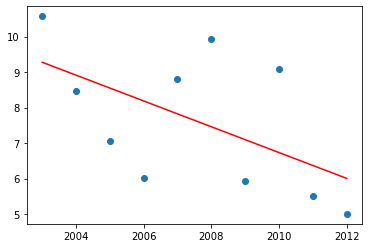

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3084114955426367

In [300]:
all_act_2012_res_p65_greater_slope = model.coef_
all_act_2012_res_p65_greater_slope

array([[-0.3634022]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p65_greater_hpd, atus_2004_unsp_p65_greater_hpd, atus_2005_unsp_p65_greater_hpd,
                                   atus_2006_unsp_p65_greater_hpd, atus_2007_unsp_p65_greater_hpd, atus_2008_unsp_p65_greater_hpd,
                                   atus_2009_unsp_p65_greater_hpd, atus_2010_unsp_p65_greater_hpd, atus_2011_unsp_p65_greater_hpd,
                                   atus_2012_unsp_p65_greater_hpd, atus_2013_unsp_p65_greater_hpd, atus_2014_unsp_p65_greater_hpd,
                                   atus_2015_unsp_p65_greater_hpd, atus_2016_unsp_p65_greater_hpd, atus_2017_unsp_p65_greater_hpd,
                                   atus_2018_unsp_p65_greater_hpd, atus_2019_unsp_p65_greater_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

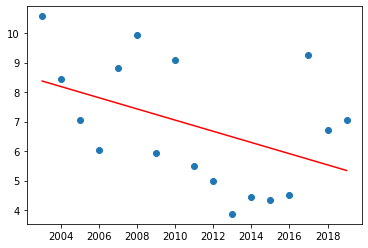

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.1978861560306786

In [304]:
all_act_2019_res_p65_greater_slope = model.coef_
all_act_2019_res_p65_greater_slope

array([[-0.18947469]])